In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.optimize import minimize

sys.path.append('..')
from Vector_2 import vector2

In [33]:
def legend_without_duplicate_labels(ax: plt.Axes) -> None:
            """
            Убирает дубликаты из легенды графика
            :param plt.Axes ax: AxesSubplot с отрисованными графиками
            :return None:
            """
            handles, labels = ax.get_legend_handles_labels()
            unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
            ax.legend(*zip(*unique))

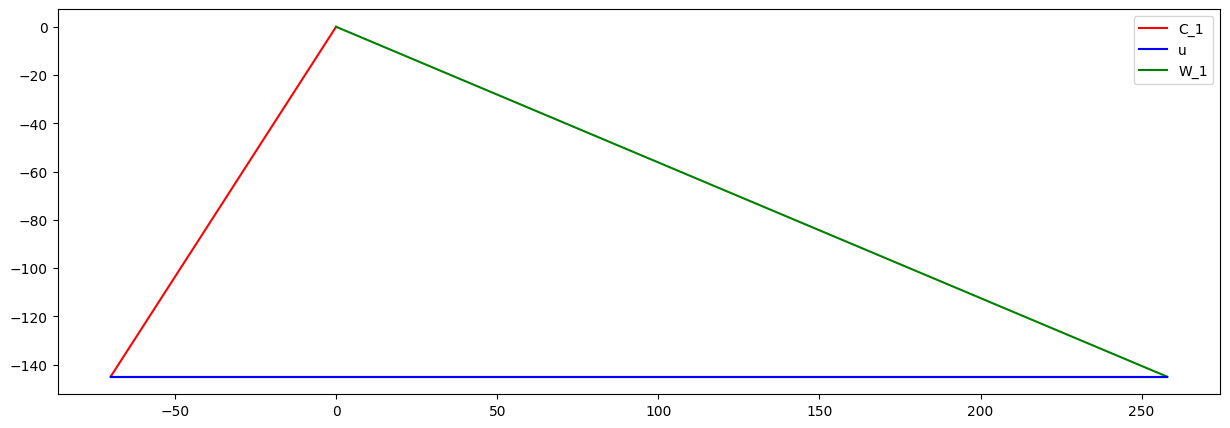

In [34]:
MPa = 1e6
to_kelvin = lambda x: x + 273.15
kJ = 1e3
MW = 1e6

average_diameter = 0.5
c1_a = 145
c1_u = 70 
u = 328
stage_work = 25 * kJ

c2_a = c1_a
w1_a = c1_a 
w2_a = c1_a 

c1 = vector2(x1 = c1_u, y1 = c1_a)

w1_u = c1_u - u
w1_a = c1_a
w1 = vector2(x1 = w1_u, y1 = w1_a)

def plot_triangle(
    ax,
    u = None,
    c = None,
    w = None,
    **kwargs,
):
    if c:
        ax.plot([0, -c.x1], [0, -c.y1], label='C_1', color='red', **kwargs)
        ax.plot([-c.x1, -c.x1 + u], [-c.y1, -c.y1], label='u', color='blue', **kwargs)
    if w:
        ax.plot([0, -w.x1], [0, -w.y1], label='W_1', color='green', **kwargs)
        ax.plot([-w.x1, -w.x1 - u], [-w.y1, -w.y1], label='u', color='blue', **kwargs)
    ax.legend()
    legend_without_duplicate_labels(ax)


            
fig, ax = plt.subplots(1, 1, figsize=(15,5))
plot_triangle(ax=ax, u=u, c=c1, w=w1, linestyle="-")

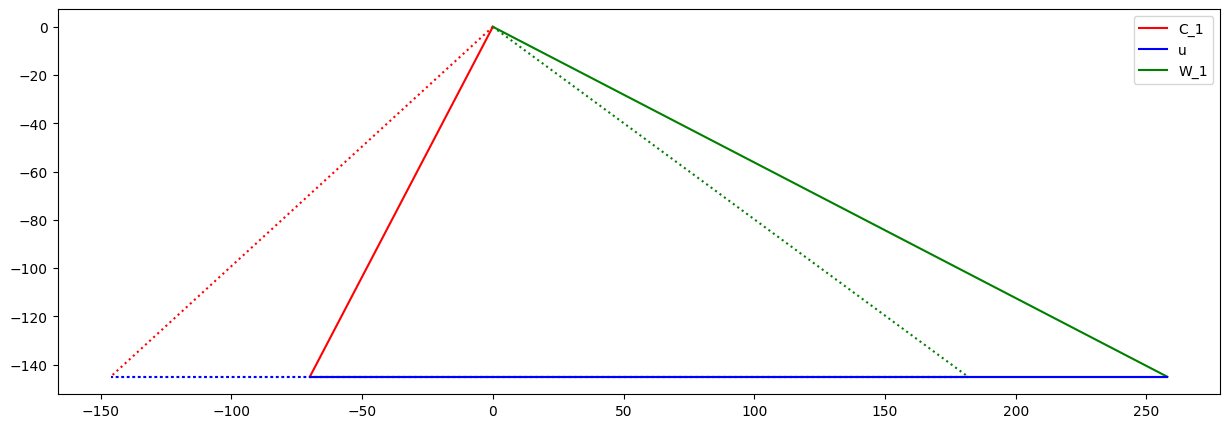

In [35]:
betta_1 = np.rad2deg(np.arccos(w1_u / w1.magnitude))

delta_w_u = stage_work / u

w2_u = w1_u + delta_w_u
w2_a = c1_a

w2 = vector2(x1 = w2_u, y1 = w2_a)


betta_2 = np.rad2deg(np.arccos(w2_u / w2.magnitude))
delta_c_u = delta_w_u

c2_u = c1_u + delta_c_u
c2_a = c1_a

c2 = vector2(x1 = c2_u, y1 = c2_a)

fig, ax = plt.subplots(1, 1, figsize=(15,5))
plot_triangle(ax=ax, u=u, c=c1, w=w1, linestyle="-")
plot_triangle(ax=ax, u=u, c=c2, w=w2, linestyle="dotted")

In [36]:
delta_betta = betta_1-betta_2

In [37]:
print("Относительные угры на входе:", betta_1, "; на выходе:", betta_2)
print("Относительная скорость на входе:", w1.magnitude, "; на выходе:", c1.magnitude)
print("Угол поворота:", delta_betta)

Относительная скорость на входе 295.95438837766875 , на выходе 161.01242188104618
Относительные угры на входе 150.66333822121572 , на выходе 141.42184838351756
Угол поворота 9.241489837698168
